In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing # preprocessing and data cleaning 
from sklearn.preprocessing import LabelEncoder # encode the string data into numerical data
# for visualization
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.impute import SimpleImputer

In [29]:
#Loading our dataset from csv file 
data=pd.read_csv('../input/widetask/training.csv', delimiter=';')
validation=pd.read_csv('../input/widetask/validation.csv', delimiter=';')


  # 1- Exploring the data 

In [30]:
data.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.


In [31]:
validation.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,b,"32,33","0,00075",u,g,e,bb,"1,585",t,f,0,t,s,420.0,0,4200000.0,NaN,1,no.
1,b,"23,58","0,000179",u,g,c,v,"0,54",f,f,0,t,g,136.0,1,1360000.0,NaN,0,no.
2,b,"36,42","7,5e-05",y,p,d,v,"0,585",f,f,0,f,g,240.0,3,2400000.0,NaN,1,no.
3,b,"18,42","0,0010415",y,p,aa,v,"0,125",t,f,0,f,g,120.0,375,1200000.0,NaN,0,no.
4,b,"24,5","0,0013335",y,p,aa,v,"0,04",f,f,0,t,g,120.0,475,1200000.0,f,1,no.


> Information about the data :
* shape 
* size 
* type of objects

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   variable1   3661 non-null   object 
 1   variable2   3661 non-null   object 
 2   variable3   3700 non-null   object 
 3   variable4   3636 non-null   object 
 4   variable5   3636 non-null   object 
 5   variable6   3634 non-null   object 
 6   variable7   3634 non-null   object 
 7   variable8   3700 non-null   object 
 8   variable9   3700 non-null   object 
 9   variable10  3700 non-null   object 
 10  variable11  3700 non-null   int64  
 11  variable12  3700 non-null   object 
 12  variable13  3700 non-null   object 
 13  variable14  3600 non-null   float64
 14  variable15  3700 non-null   int64  
 15  variable17  3600 non-null   float64
 16  variable18  1555 non-null   object 
 17  variable19  3700 non-null   int64  
 18  classLabel  3700 non-null   object 
dtypes: float64(2), int64(3), ob

In [33]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   variable1   197 non-null    object 
 1   variable2   197 non-null    object 
 2   variable3   200 non-null    object 
 3   variable4   198 non-null    object 
 4   variable5   198 non-null    object 
 5   variable6   197 non-null    object 
 6   variable7   197 non-null    object 
 7   variable8   200 non-null    object 
 8   variable9   200 non-null    object 
 9   variable10  200 non-null    object 
 10  variable11  200 non-null    int64  
 11  variable12  200 non-null    object 
 12  variable13  200 non-null    object 
 13  variable14  197 non-null    float64
 14  variable15  200 non-null    int64  
 15  variable17  197 non-null    float64
 16  variable18  89 non-null     object 
 17  variable19  200 non-null    int64  
 18  classLabel  200 non-null    object 
dtypes: float64(2), int64(3), obje

In [34]:
# Showing the unique values for variables
d=['variable1','variable4','variable5','variable6','variable7','variable9','variable10','variable11','variable12','variable13','variable19','classLabel']
for col in d:
    print (col,data[col].unique())

variable1 ['a' 'b' nan]
variable4 ['u' 'y' nan 'l']
variable5 ['g' 'p' nan 'gg']
variable6 ['c' 'k' 'ff' 'i' 'j' 'q' 'W' 'd' 'm' 'cc' 'aa' 'r' 'x' 'e' nan]
variable7 ['v' 'ff' 'o' 'h' 'j' 'bb' 'n' 'z' nan 'dd']
variable9 ['f' 't']
variable10 ['t' 'f']
variable11 [ 1  0  2  3  5 15 20 11  4 12  7  9 14  6 10 16  8 19 23 13 67 40 17]
variable12 ['t' 'f']
variable13 ['g' 's' 'p']
variable19 [0 1]
classLabel ['no.' 'yes.']


In [35]:
for col in d:
    print (col,validation[col].unique())

variable1 ['b' 'a' nan]
variable4 ['u' 'y' nan]
variable5 ['g' 'p' nan]
variable6 ['e' 'c' 'd' 'aa' 'm' 'k' 'ff' 'W' 'q' 'i' 'x' 'cc' nan 'j']
variable7 ['bb' 'v' 'ff' 'z' 'h' nan 'dd' 'n' 'j']
variable9 ['t' 'f']
variable10 ['f' 't']
variable11 [ 0  1  2 20  3  5  9 11 17 10  4  6 14 12  7  8]
variable12 ['t' 'f']
variable13 ['s' 'g' 'p']
variable19 [1 0]
classLabel ['no.' 'yes.']


In [36]:
# More details about the unique values
for col in d:
    print (data[col].value_counts())

b    2382
a    1279
Name: variable1, dtype: int64
u    3055
y     549
l      32
Name: variable4, dtype: int64
g     3055
p      549
gg      32
Name: variable5, dtype: int64
c     787
q     612
W     363
cc    343
x     340
aa    210
i     191
m     179
k     170
e     137
ff    136
d      94
j      39
r      33
Name: variable6, dtype: int64
v     2015
h      970
bb     339
ff     154
z       49
j       37
n       33
dd      20
o       17
Name: variable7, dtype: int64
t    3171
f     529
Name: variable9, dtype: int64
t    2239
f    1461
Name: variable10, dtype: int64
0     1461
1      367
3      260
2      227
6      194
11     193
5      193
7      161
4      130
9       80
12      80
15      64
8       64
16      48
10      34
14      32
19      16
40      16
20      16
17      16
23      16
13      16
67      16
Name: variable11, dtype: int64
f    1924
t    1776
Name: variable12, dtype: int64
g    3430
s     189
p      81
Name: variable13, dtype: int64
1    3424
0     276
Name: varia

In [37]:
for col in d:
    print (validation[col].value_counts())

b    141
a     56
Name: variable1, dtype: int64
u    149
y     49
Name: variable4, dtype: int64
g    149
p     49
Name: variable5, dtype: int64
c     40
aa    24
q     21
i     18
k     16
W     16
cc    13
x     13
d     11
m      9
e      8
ff     7
j      1
Name: variable6, dtype: int64
v     124
h      38
bb     20
ff      8
z       4
dd      1
j       1
n       1
Name: variable7, dtype: int64
t    115
f     85
Name: variable9, dtype: int64
f    104
t     96
Name: variable10, dtype: int64
0     104
1      19
2      13
6       9
3       8
14      6
11      6
8       6
9       5
7       5
5       5
4       5
10      4
12      3
20      1
17      1
Name: variable11, dtype: int64
f    100
t    100
Name: variable12, dtype: int64
g    180
s     18
p      2
Name: variable13, dtype: int64
1    100
0    100
Name: variable19, dtype: int64
no.     107
yes.     93
Name: classLabel, dtype: int64


**Here we can see that the data is not blanced and fall of missing values**

In [38]:
# Fill the nan values with the common values to be used in the training
data['variable1']=data['variable1'].fillna('b')
data['variable4']=data['variable4'].fillna('u')
data['variable6']=data['variable6'].fillna('c')
data['variable7']=data['variable7'].fillna('t')
validation['variable1']=validation['variable1'].fillna('b')
validation['variable4']=validation['variable4'].fillna('u')
validation['variable6']=validation['variable6'].fillna('c')
validation['variable7']=validation['variable7'].fillna('t')

In [39]:
# This Function encodes the sting with one hot encoder algorthem , 
# it takes one variable as input and returns it into numircal values
def encode_string(cat_features):
    # First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc_cat_features = enc.fit_transform(cat_features)
    
    # Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit_transform(enc_cat_features.reshape(-1,1))
    return enc_cat_features.reshape(-1,1)

In [40]:
# This function replaces the point from ',' to '.' that helps the float function to work with the input 
def strToFloat(col) :
    newCol=[]
    for i in col:
        i=str(i)
        i=i.replace(',','.')
        newCol.append(float(i))
    return newCol

In [41]:
# encoding the values 
d=['variable1','variable5','variable6','variable7','variable9','variable10','variable12','variable13']
for col in d :
    data[col]=encode_string(data[col].astype(str))
    validation[col]=encode_string(validation[col].astype(str))

In [42]:
# This variables in the list (d) have mixed values (str,float) so it will be transformed only into float values
d=['variable2','variable8','variable3']
for col in d:
    data[col]=strToFloat(data[col])
    validation[col]=strToFloat(validation[col])

In [43]:
# fill nan values with the median to prevent working with missng values
import statistics
data['variable2']=data['variable2'].fillna(statistics.median(data['variable2']))
validation['variable2']=validation['variable2'].fillna(statistics.median_high(validation['variable2']))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb428a86950>,
      dtype=object)

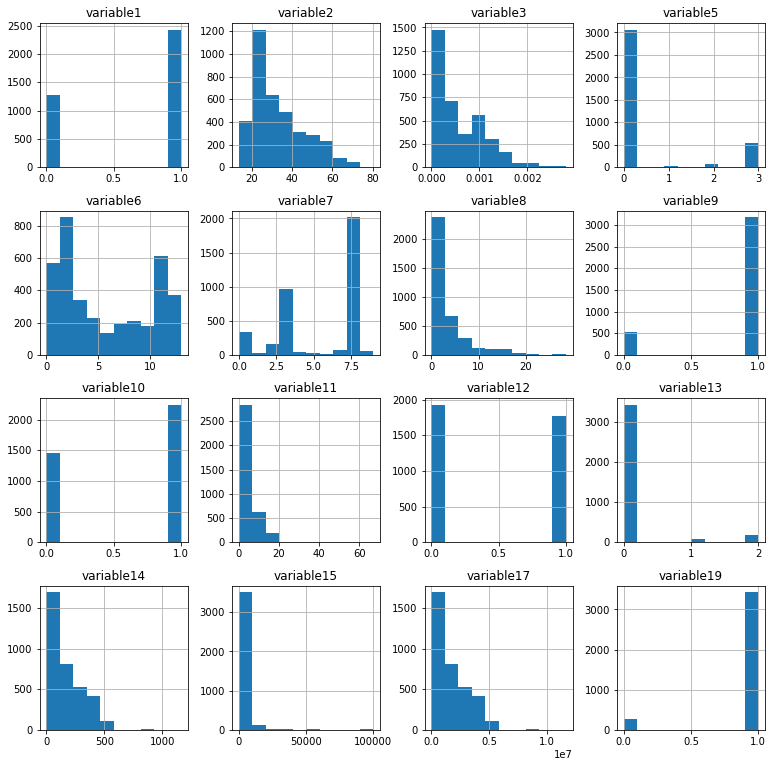

In [44]:
# plotting the histograms of the data
%matplotlib inline
data.hist(figsize=(13,13))

In [45]:
data.describe()

,variable1,variable2,variable3,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable19
count,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3600.000000,3700.000000,3.600000e+03,3700.000000
mean,0.654324,33.110307,0.000585,0.488378,5.767297,5.588108,3.439496,0.857027,0.605135,4.160000,0.480000,0.124054,162.695000,2246.705946,1.626950e+06,0.925405
std,0.475652,12.907954,0.000540,1.083996,4.450158,2.942096,4.335229,0.350093,0.488888,6.750553,0.499667,0.459221,156.045682,8708.571126,1.560457e+06,0.262772
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,23.000000,0.000150,0.000000,2.000000,3.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000
50%,1.000000,28.670000,0.000425,0.000000,4.000000,8.000000,1.750000,1.000000,1.000000,2.000000,0.000000,0.000000,120.000000,113.000000,1.200000e+06,1.000000
75%,1.000000,41.042500,0.000963,0.000000,11.000000,8.000000,5.000000,1.000000,1.000000,6.000000,1.000000,0.000000,280.000000,1059.750000,2.800000e+06,1.000000
max,1.000000,80.250000,0.002800,3.000000,13.000000,9.000000,28.500000,1.000000,1.000000,67.000000,1.000000,2.000000,1160.000000,100000.000000,1.160000e+07,1.000000


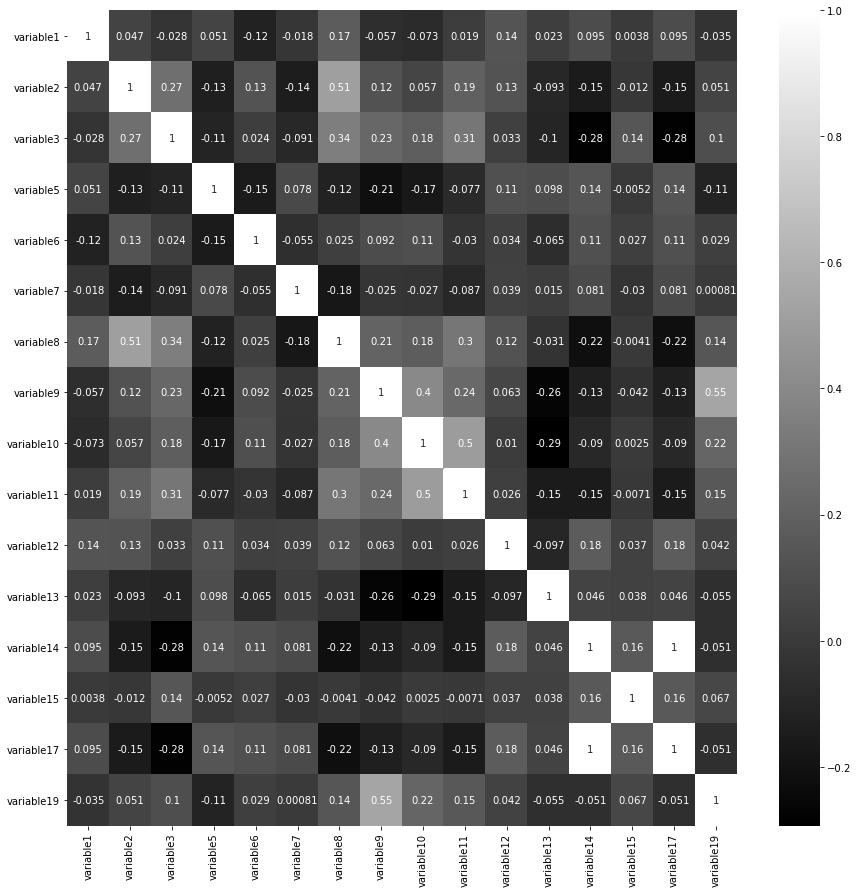

In [46]:
# The corelation between the variables 
ig,axis = plt.subplots(figsize=(15,15))
axis = sb.heatmap(data=data.corr(method='pearson',min_periods=1),annot=True,cmap="gray")

#   Some conclusions from above :
* The variables (17 , 14) are the same but with diffrent scale . 
* The variables  (4 , 5) are the same but with diffrent encoding . 
* The variable (19) is the binary represention of the class lable .
* the variables (2,3,6,7,8,9,10,15) are corelated to the target variable so we can make it in consider to train our model and give away from the other unnessary variables .

In [47]:
# We will drop the unnessary varibles from the dataset beacuse it has a lot of missing values

data.drop(['variable1','variable5','variable14','variable13','variable18','variable4','variable17','classLabel'], inplace=True, axis=1)
validation.drop(['variable1','variable5','variable14','variable13','variable18','variable4','variable17','classLabel'], inplace=True, axis=1)


In [48]:
y_train = data['variable19']
data.drop(['variable19'], inplace=True, axis=1)
y_test = validation['variable19']
validation.drop(['variable19'], inplace=True, axis=1)
X_train=data
X_test=validation

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   variable2   3700 non-null   float64
 1   variable3   3700 non-null   float64
 2   variable6   3700 non-null   int64  
 3   variable7   3700 non-null   int64  
 4   variable8   3700 non-null   float64
 5   variable9   3700 non-null   int64  
 6   variable10  3700 non-null   int64  
 7   variable11  3700 non-null   int64  
 8   variable12  3700 non-null   int64  
 9   variable15  3700 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 289.2 KB


In [50]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   variable2   200 non-null    float64
 1   variable3   200 non-null    float64
 2   variable6   200 non-null    int64  
 3   variable7   200 non-null    int64  
 4   variable8   200 non-null    float64
 5   variable9   200 non-null    int64  
 6   variable10  200 non-null    int64  
 7   variable11  200 non-null    int64  
 8   variable12  200 non-null    int64  
 9   variable15  200 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 15.8 KB


In [51]:

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(3700, 10) (3700,)
(200, 10) (200,)


In [52]:
cols_with_missing = [col for col in X_train.columns 
                                 if X_train[col].isnull().any()]
X_train = X_train.drop(cols_with_missing, axis=1)
X_test = X_test.drop(cols_with_missing, axis=1)

In [53]:

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(3700, 10) (3700,)
(200, 10) (200,)


# 2- The training
Here I am using collection of the algorthems and comparing the preformance for eah one by F1 score metric for (the unblanced data )

In [55]:
#Importing the algorithms from sklearn library
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from prettytable import PrettyTable
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


In [56]:
logistic_regression = LogisticRegression(random_state=1, n_jobs=-1)

decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)

k_neighbors = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski', n_jobs=-1)

logistic_regression_pipe = Pipeline([['sc', StandardScaler()],
                                     ['clf', logistic_regression]])
KNeighbors_pipe = Pipeline([['sc', StandardScaler()],
                            ['clf', k_neighbors]])

ada_boost_classifier_pipe = Pipeline([
    ['clf', AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=2),
        n_estimators=500,
        learning_rate=0.1,
        random_state=1)]
])
gaussian_nb = Pipeline([('sc', StandardScaler()),
                        ('clf', GaussianNB())])

svm_pipe = Pipeline([('sc', StandardScaler()),
                     ('clf', SVC(kernel='poly'))])

random_forest = Pipeline([
    ['clf', RandomForestClassifier(criterion='entropy', n_estimators=100, n_jobs=-1)]])

py_voting_classifier = VotingClassifier(estimators=[
    ('lr', logistic_regression_pipe), ('dt', decision_tree), ('KNN', KNeighbors_pipe), ('rf', random_forest),
    ('svm', svm_pipe)],
    voting='hard', n_jobs=-1)

clf_labels = ['Logistic regression', 'Decision tree', 'KNN', 'gaussian_nb', 'svm', 'AdaBoostClassifier',
              'Random Forest', 'Majority voting', 'py_voting_classifier']

all_clf = [logistic_regression_pipe, decision_tree, KNeighbors_pipe, gaussian_nb, svm_pipe, ada_boost_classifier_pipe,
           random_forest, py_voting_classifier]

tabel = PrettyTable()
tabel.field_names = ["estimator", "score", 'f1 score', 'recall score', 'precision score']
for clf, label in zip(all_clf, clf_labels):
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_pred)
    tabel.add_row(
        [label, score, f1_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred)])
    print(label, ' : ', f1_score(y_test, y_pred))

Logistic regression  :  0.6423357664233577
Decision tree  :  0.4854368932038835
KNN  :  0.4976076555023924
gaussian_nb  :  0.47959183673469385
svm  :  0.592885375494071
AdaBoostClassifier  :  0.5161290322580645
Random Forest  :  0.5185185185185185
Majority voting  :  0.5517241379310344


# conclusion
The logistic regression is the best to train on this data with ( F1 score ) 64% and it doesn't overfit on the data like the other.
and I think that the data is challenging with many missed values and it's un blanced between classes so the accurcy will not be better .